In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

[]

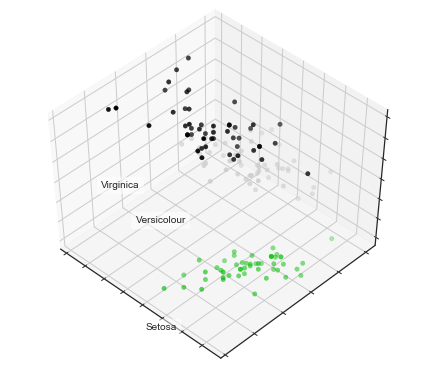

In [3]:
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Поменяем порядок цветов меток, чтобы они соответствовали правильному
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr, cmap=plt.cm.spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

In [4]:
# Выделим из наших данных валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

# Для примера возьмём неглубокое дерево решений
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

Accuracy: 0.88889


In [5]:
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

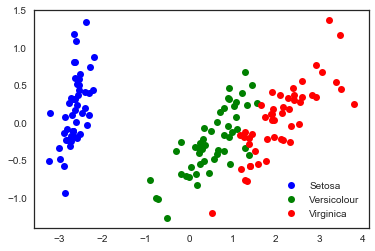

In [6]:
plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0)

In [7]:
# Повторим то же самое разбиение на валидацию и тренировочную выборку.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))


Accuracy: 0.91111


In [8]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

1 component: 92.46% of initial variance
0.362 x sepal length (cm) + -0.082 x sepal width (cm) + 0.857 x petal length (cm) + 0.359 x petal width (cm)
2 component: 5.3% of initial variance
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.176 x petal length (cm) + -0.075 x petal width (cm)


In [9]:
def fig_3d(X,y):
    plt.clf()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], y, c=y, marker='o', cmap='autumn', edgecolors='black', s = 50, linewidths=1.5)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

In [10]:
dataset=np.loadtxt('transfusion.txt', delimiter=',', dtype=str, )
titles=np.loadtxt('transfusion_titles.txt', delimiter=',',dtype=str)
dataset=[[float(n) for n in e] for e in dataset]
X=[]
y=[]
for row in dataset:
    X.append(row[:4])
    y.append(int(row[4]))
X=np.array(X)
y=np.array(y)

1 component: 99.98% of initial variance
-0.001 x Recency (months) + 0.004 x Frequency (times) + 1.000 x Monetary (c.c. blood) + 0.011 x Time (months)
2 component: 0.02% of initial variance
0.178 x Recency (months) + -0.000 x Frequency (times) + -0.010 x Monetary (c.c. blood) + 0.984 x Time (months)


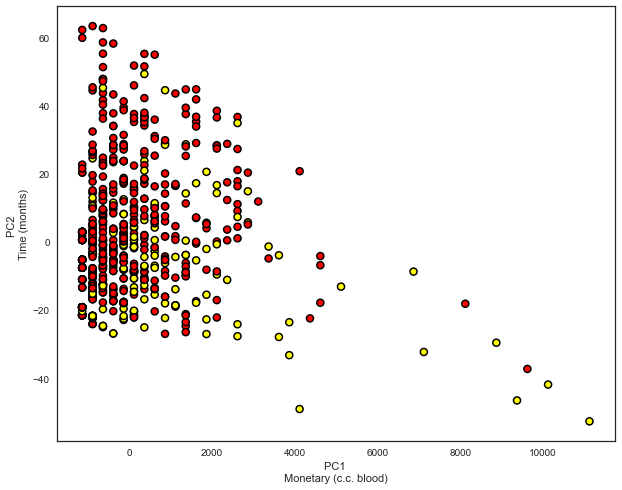

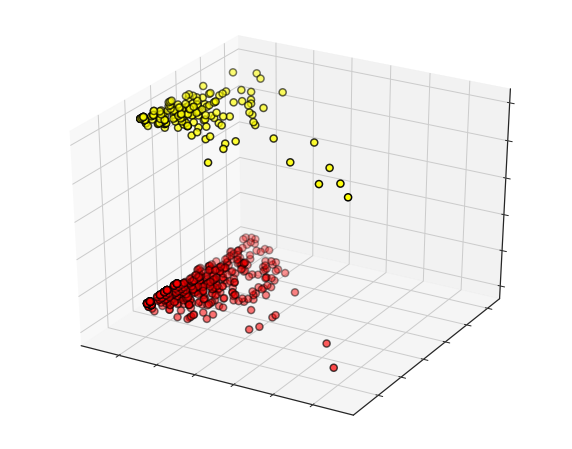

In [11]:
pca=decomposition.PCA(n_components=2)
X_pca=pca.fit_transform(X)
# plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'ro', label='NO')
# plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'yo', label='YES')
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            titles)))
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s = 50, cmap='autumn', edgecolors='black', linewidths=1.5)
plt.xlabel('PC1 \n'+titles[2])
plt.ylabel('PC2 \n'+titles[3])
plt.legend(loc=0)
plt.show()
fig_3d(X_pca,y)

In [12]:
dataset=np.loadtxt('out_points.txt', delimiter=' ', dtype=str, )
dataset=[[float(n) for n in e] for e in dataset]
X=[]
y=[]
for row in dataset:
    X.append(row[:-1])
    y.append(int(row[-1]))
X=np.array(X)
y=np.array(y)

1 component: 47.97% of initial variance
2 component: 13.98% of initial variance


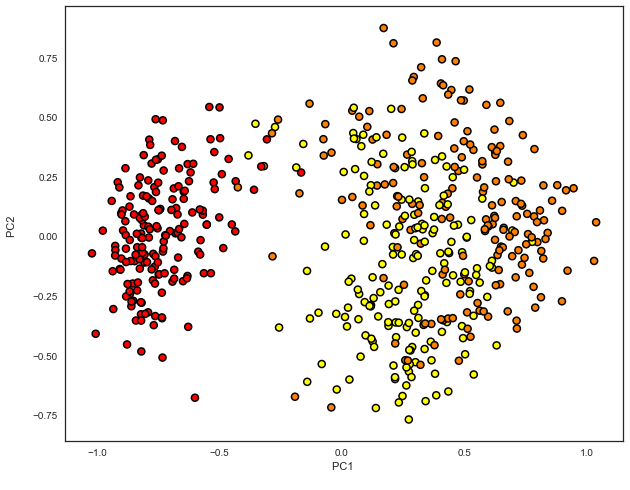

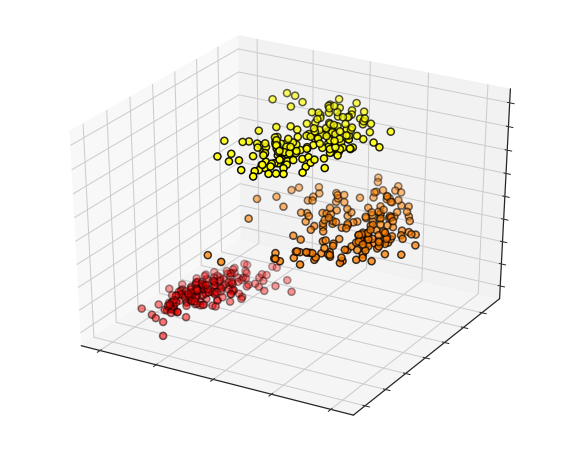

In [13]:
pca=decomposition.PCA(n_components=2)
X_pca=pca.fit_transform(X)
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s = 50, cmap='autumn', edgecolors='black', linewidths=1.5)
plt.xlabel('PC1 \n')
plt.ylabel('PC2 \n')
plt.legend(loc=0)
plt.show()
fig_3d(X_pca,y)

In [14]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

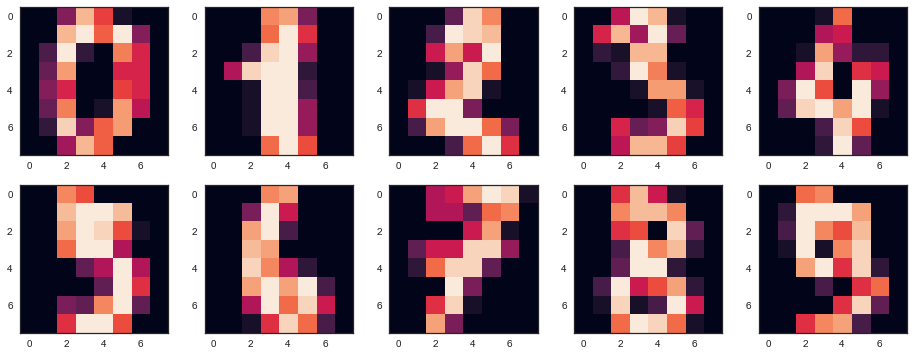

In [15]:
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]));

Projecting 64-dimensional data to 2D
1 component: 14.89% of initial variance
2 component: 13.62% of initial variance


Text(0.5,1,'MNIST. PCA projection')

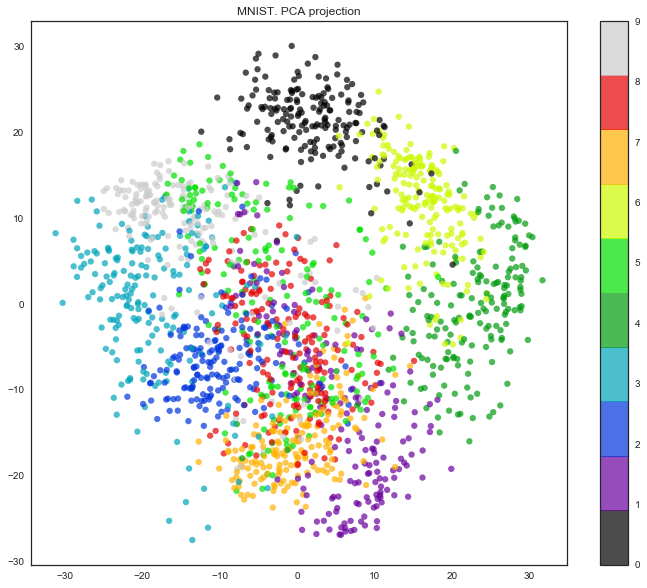

In [16]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X)
print('Projecting %d-dimensional data to 2D' % X.shape[1])
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1, 
          round(100 * pca.explained_variance_ratio_[i], 2)))

plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection')

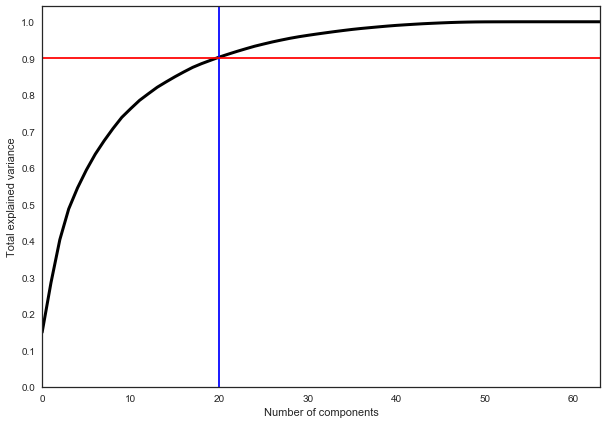

In [17]:
pca = decomposition.PCA().fit(X)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=3)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(20, c='b')
plt.axhline(0.9, c='r')
plt.show();